In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from scipy.ndimage import rotate


In [2]:
train = pd.read_csv("thedataset/version2.csv")
train
# Get the name of the first column
first_column_name = train.columns[0]
classes = []
# Select the first column
first_column = train[first_column_name]

# Get the unique values
unique_values = first_column.unique()
classes.append(unique_values)
# Print the unique values
print(unique_values)

[27 28 29 31 32 30 67 68 70 71]


In [3]:
mapping = {27: "ç", 28: "ğ", 67: "Ğ", 29: "ı", 68: "İ", 30: "ş", 31: "ö", 70: "Ö", 32: "ü", 71: "Ü" }

> This dataset has been provided by 
---
"G. Ediboğlu Bartos, Y. Hoscan, A. Kauer, and É. Hajnal, “A Multilingual Handwritten Character Dataset: T-H-E Dataset,” Acta Polytechnica Hungarica, 2020.(under acceptance)"
> The classes this dataset include ç-27 Ç-66 ğ-28 Ğ-67 ı-29 İ-68 ş-30 Ş-69 ö-31 Ö-70 ü-32 Ü-71 but the classes 66 and 69 which are capital Ç and Ş missing.

> I will be using another dataset to close the gaps and widen the training set.

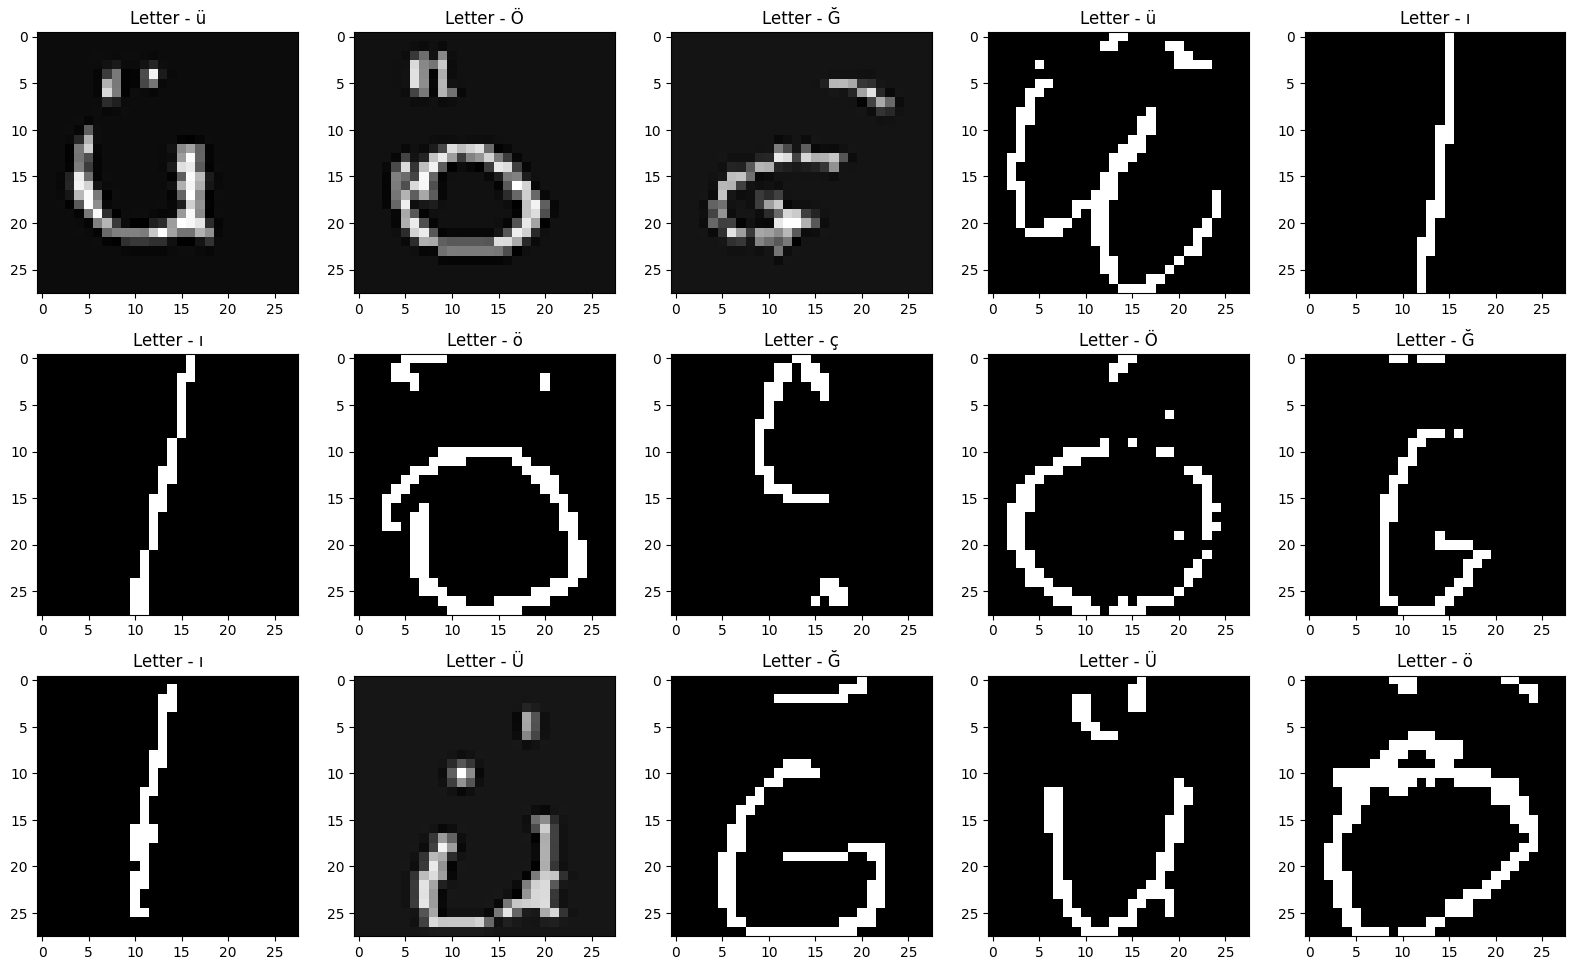

In [4]:
def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        random_class = random.choice(list(mapping.keys()))
        filtered_train = train[train[first_column_name] == random_class]
        random_row = filtered_train.sample()    
        pixels = np.array(random_row.iloc[0])
        pixels = pixels[1:]
        image = pixels.reshape(28, 28)
        image = image.T
        plt.subplot(5, 5,idx+1)
        plt.imshow(image, cmap = mono)
        plt.title(f"Letter - {mapping[random_class]}")
        
    plt.tight_layout()
    
Show_example_digits()

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.cuda.is_available()

False

In [6]:
# Setting a location for the data.
data = "extended_emnist"

# Setting up training and testing datas.
train_data = datasets.EMNIST(
    root=data,
    split="byclass",
    train= True,
    transform=ToTensor(),
    download=False,
    target_transform=None
)

test_data = datasets.EMNIST(
    root=data,
    split="byclass",
    train=False,
    transform=ToTensor(),
    download=False
)

In [ ]:
def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        random_class = random.choice(list(mapping.keys()))
        filtered_train = train[train[first_column_name] == random_class]
        random_row = filtered_train.sample()    
        pixels = np.array(random_row.iloc[0])
        pixels = pixels[1:]
        image = pixels.reshape(28, 28)
        image = image.T
        plt.subplot(5, 5,idx+1)
        plt.imshow(image, cmap = mono)
        plt.title(f"Letter - {mapping[random_class]}")
        
    plt.tight_layout()
    
Show_example_digits()

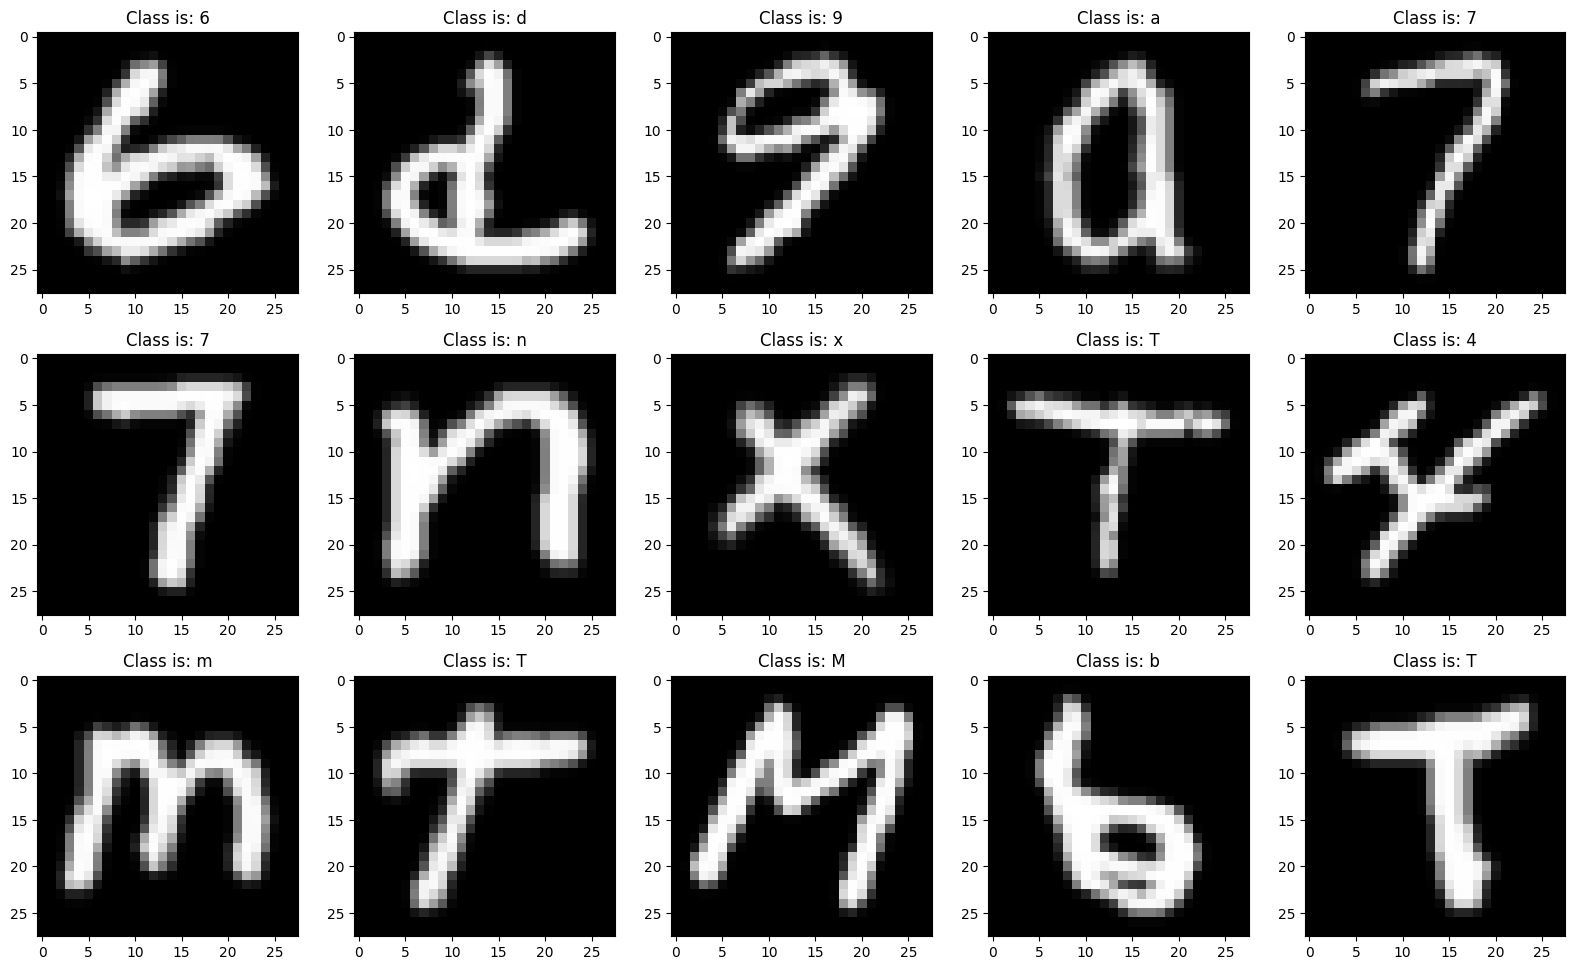

In [79]:
def Show_example_digits(mono = 'gray'):
    fig = plt.figure(figsize = (16, 16))
    for idx in range(15):
        number = random.randint(0, len(train_data))
        image, label = train_data[number]
        angle = -90
        rotated_image = rotate(image.squeeze(), angle)
        flipped_image = np.fliplr(rotated_image.squeeze())
        plt.subplot(5, 5,idx+1)
        plt.imshow(flipped_image.squeeze(),cmap='gray')
        plt.title(f"Class is: {train_data.classes[label]}")
    
    plt.tight_layout()

Show_example_digits()

Class 35 (Z): 2701
Class 36 (a): 10033
Class 6 (6): 34232
Class 3 (3): 35143
Class 22 (M): 9002
Class 38 (c): 2854
Class 5 (5): 31416
Class 9 (9): 33847
Class 47 (l): 15318
Class 4 (4): 33535
Class 7 (7): 35754
Class 56 (u): 2830
Class 29 (T): 9820
Class 40 (e): 24631
Class 55 (t): 18262
Class 57 (v): 2910
Class 43 (h): 8738
Class 32 (W): 4695
Class 15 (F): 9182
Class 26 (Q): 2605
Class 2 (2): 34203
Class 28 (S): 20764
Class 8 (8): 33946
Class 49 (n): 11418
Class 12 (C): 10094
Class 1 (1): 38374
Class 59 (x): 2822
Class 18 (I): 11946
Class 41 (f): 2561
Class 0 (0): 34585
Class 46 (k): 2491
Class 23 (N): 8237
Class 51 (p): 2448
Class 24 (O): 24983
Class 31 (V): 4637
Class 45 (j): 1896
Class 39 (d): 10177
Class 11 (B): 3878
Class 54 (s): 2699
Class 19 (J): 3762
Class 20 (K): 2468
Class 61 (z): 2725
Class 25 (P): 8347
Class 37 (b): 5159
Class 52 (q): 2994
Class 58 (w): 2697
Class 14 (E): 4934
Class 34 (Y): 4743
Class 30 (U): 12602
Class 27 (R): 5073
Class 16 (G): 2517
Class 33 (X): 2771
C

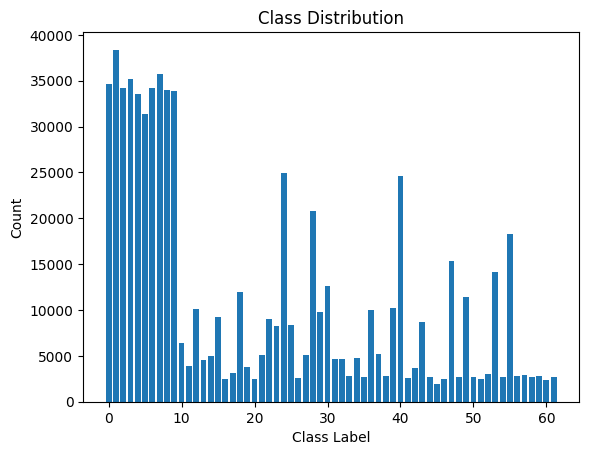

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of instances per class
class_counts = Counter([train_data[i][1] for i in range(len(train_data))])

# Print the class counts
for class_label, count in class_counts.items():
    print(f"Class {class_label} ({train_data.classes[class_label]}): {count}")

# Plot the class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [1]:
import os

# Specify the directory you want to list files from
directory = 'extended_emnist\\EMNIST\\raw'

files = os.listdir(directory)

for file in files:
    print(file)
    print("test")


emnist-balanced-test-images-idx3-ubyte
test
emnist-balanced-test-labels-idx1-ubyte
test
emnist-balanced-train-images-idx3-ubyte
test
emnist-balanced-train-labels-idx1-ubyte
test
emnist-byclass-test-images-idx3-ubyte
test
emnist-byclass-test-labels-idx1-ubyte
test
emnist-byclass-train-images-idx3-ubyte
test
emnist-byclass-train-labels-idx1-ubyte
test
emnist-bymerge-test-images-idx3-ubyte
test
emnist-bymerge-test-labels-idx1-ubyte
test
emnist-bymerge-train-images-idx3-ubyte
test
emnist-bymerge-train-labels-idx1-ubyte
test
emnist-digits-test-images-idx3-ubyte
test
emnist-digits-test-labels-idx1-ubyte
test
emnist-digits-train-images-idx3-ubyte
test
emnist-digits-train-labels-idx1-ubyte
test
emnist-letters-test-images-idx3-ubyte
test
emnist-letters-test-labels-idx1-ubyte
test
emnist-letters-train-images-idx3-ubyte
test
emnist-letters-train-labels-idx1-ubyte
test
emnist-mnist-test-images-idx3-ubyte
test
emnist-mnist-test-labels-idx1-ubyte
test
emnist-mnist-train-images-idx3-ubyte
test
emnist